In [1]:
import sys
import os

path = os.getcwd()
parent = os.path.dirname(path)
sys.path.append(parent)

In [2]:
from models import LSTM_Model
import matplotlib.pyplot as plt
import datetime

2024-03-26 21:04:39.517860: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-26 21:04:39.559849: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 21:04:39.769059: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 21:04:39.769091: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 21:04:39.770209: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [3]:
stock_models = {}
stock_tests = {}
stock_val_losses = {}
stock_mae = {}
stock_rmse = {}
tickers = ["GOOG", "MSFT", "AMZN", "AAPL", "META"]

In [4]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2023, 12, 31)

In [5]:
for ticker in tickers:
    stock_models[ticker] = LSTM_Model.LSTM_Model(stock_ticker=ticker, start=start, end=end, n_epochs=100, batch_size=32, look_back=32, num_features=1)
    stock_mae[ticker], stock_rmse[ticker] = stock_models[ticker].predict()
    stock_tests[ticker] = stock_models[ticker].get_test()
    stock_val_losses[ticker] = stock_models[ticker].get_validation_loss()

[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 14ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 11ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 13ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 11ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 9ms/step


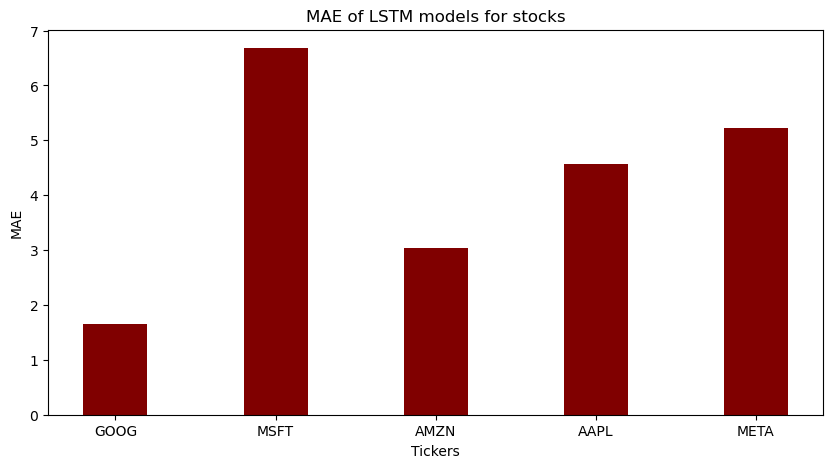

In [6]:
mae_values = list(stock_mae.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(tickers, mae_values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Tickers")
plt.ylabel("MAE")
plt.title("MAE of LSTM models for stocks")
plt.show()

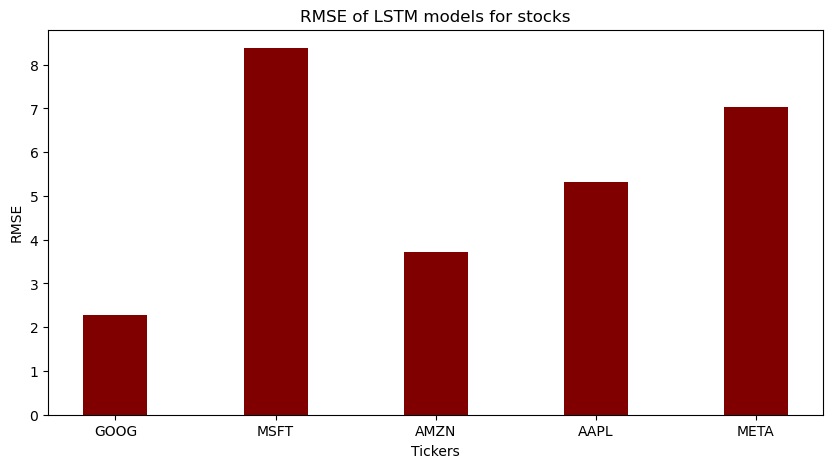

In [7]:
rmse_values = list(stock_rmse.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(tickers, rmse_values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Tickers")
plt.ylabel("RMSE")
plt.title("RMSE of LSTM models for stocks")
plt.show()

/tmp/ipykernel_5705/2361628061.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


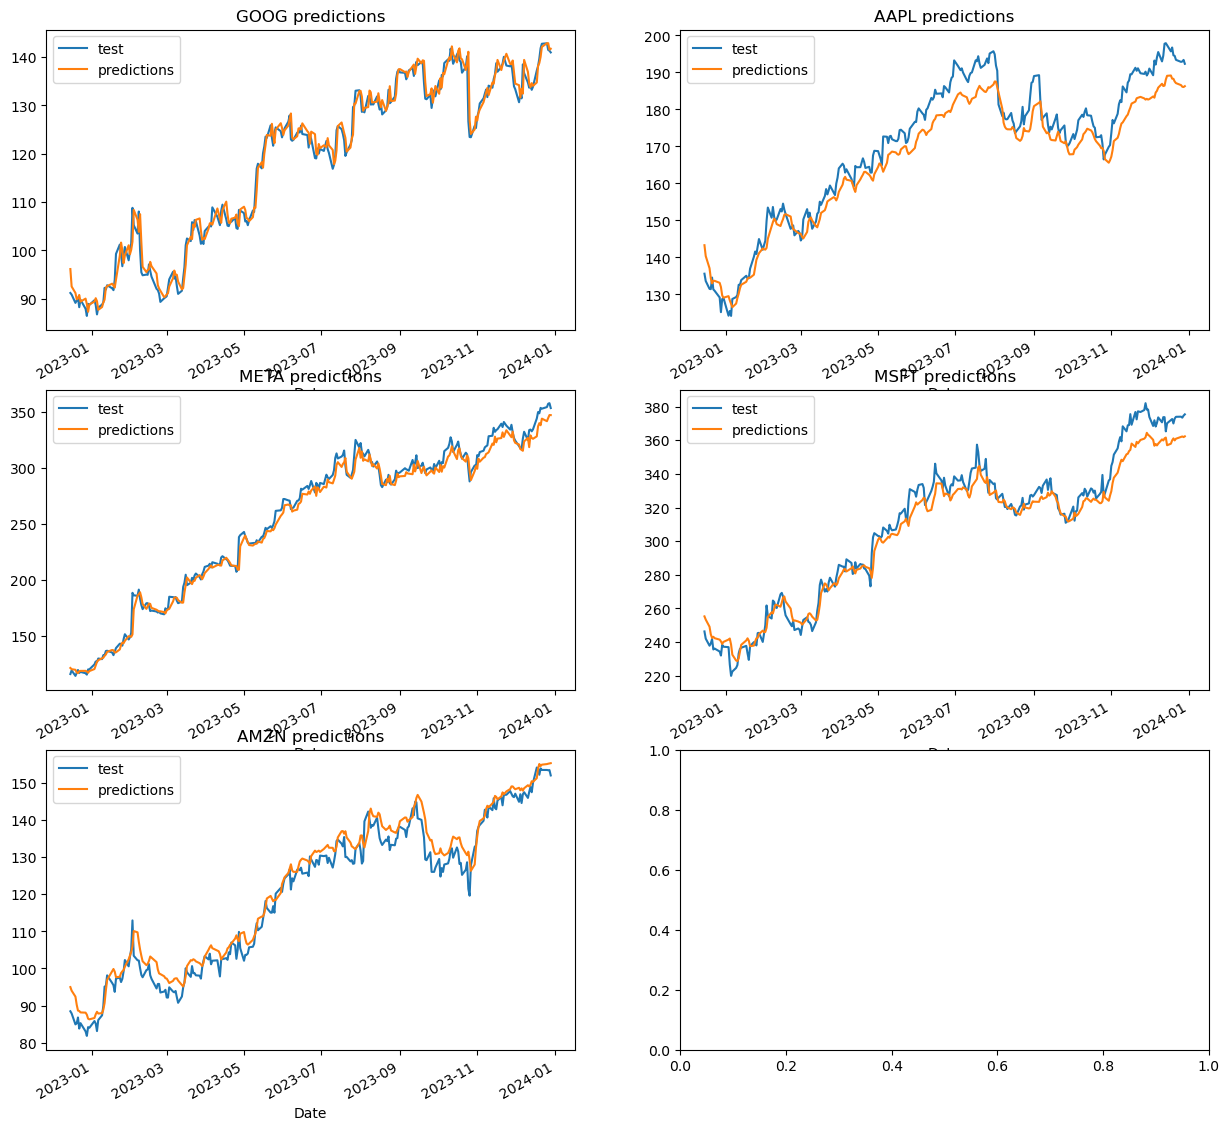

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)
i = j = 0

for ticker in stock_tests.keys():
    stock_tests[ticker].plot(ax=axes[i, j])
    axes[i, j].set_title(f"{ticker} predictions")
    i = (i+1) % 3
    j = (j+1) % 2
fig.show()

/tmp/ipykernel_5705/1885570865.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


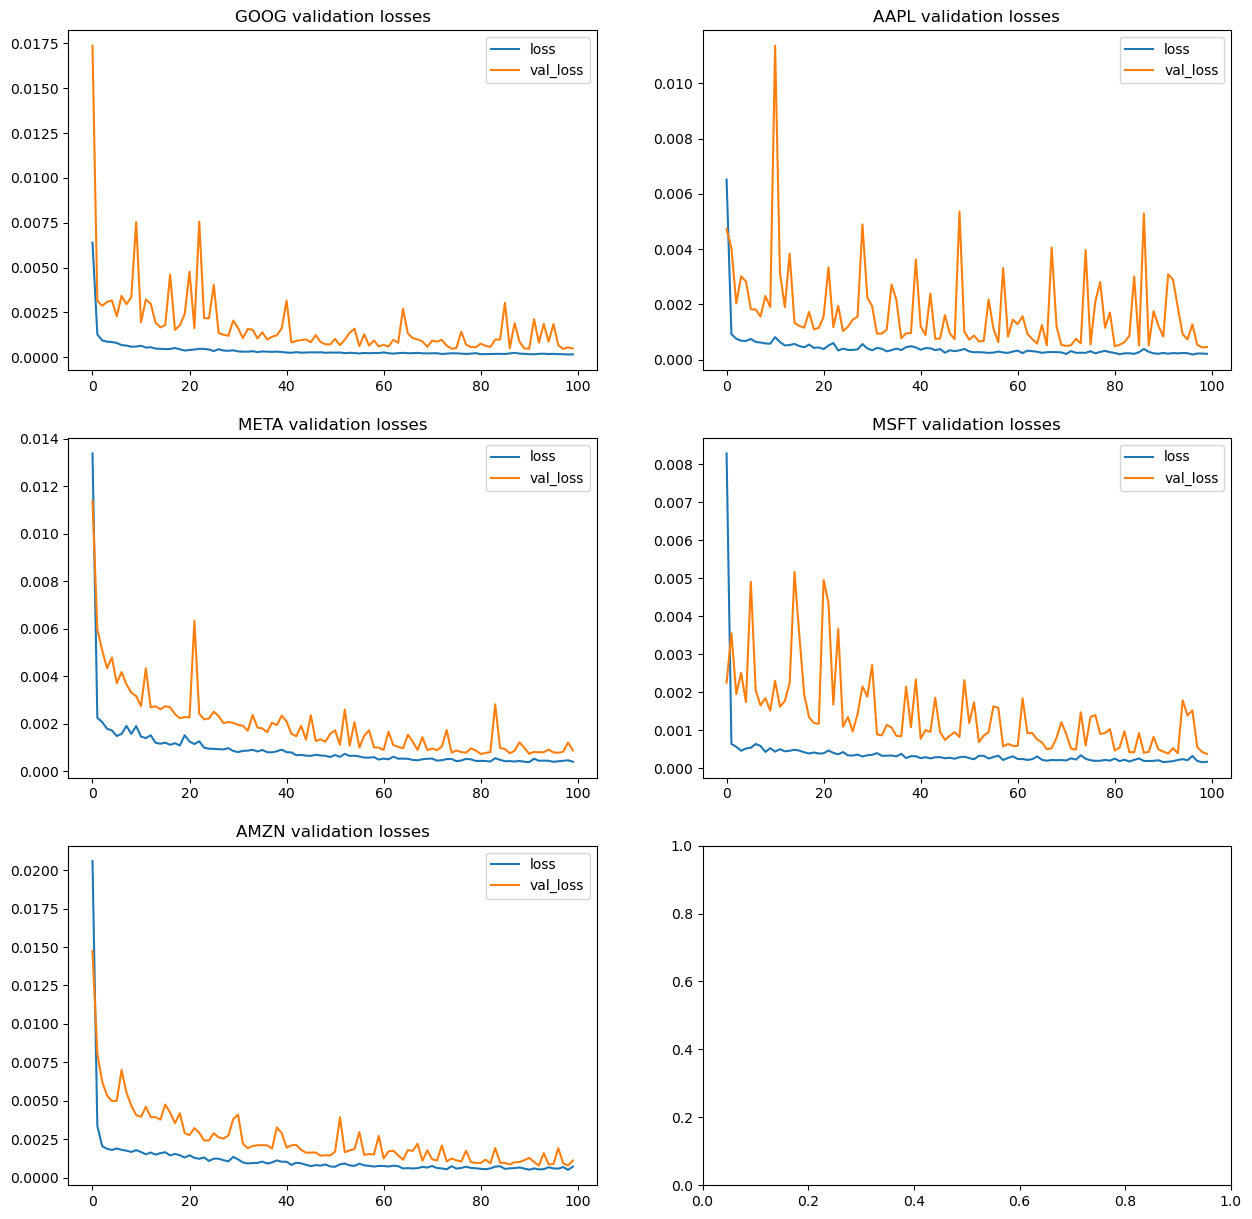

In [9]:
fig2, axes2 = plt.subplots(nrows=3, ncols=2)
fig2.set_figheight(15)
fig2.set_figwidth(15)
i = j = 0

for ticker in stock_val_losses.keys():
    stock_val_losses[ticker].plot(ax=axes2[i, j])
    axes2[i, j].set_title(f"{ticker} validation losses")
    i = (i+1) % 3
    j = (j+1) % 2
fig2.show()

In [10]:
stock_mae

{'GOOG': 1.6532403061673102,
 'MSFT': 6.681958662595785,
 'AMZN': 3.0328386679463004,
 'AAPL': 4.566802832358642,
 'META': 5.216976706552323}

In [11]:
stock_rmse

{'GOOG': 2.272709787416635,
 'MSFT': 8.380817610323462,
 'AMZN': 3.7204751368148967,
 'AAPL': 5.330107960824859,
 'META': 7.043095298841616}